## [作業重點]
確保你了解隨機森林模型中每個超參數的意義，並觀察調整超參數對結果的影響

## 作業

1. 試著調整 RandomForestClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型與決策樹的結果進行比較

In [28]:
from sklearn import datasets, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

wine = datasets.load_wine()
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=4)

In [31]:
reg = RandomForestClassifier()
reg.fit(x_train, y_train)
pred = reg.predict(x_test)
acc = metrics.accuracy_score(y_test, pred)
print("acc: ", acc)

acc:  1.0


C:\Users\b1212\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [32]:
print("Feature importance: ", reg.feature_importances_)

Feature importance:  [0.13423262 0.0163821  0.01606883 0.02180726 0.07333582 0.05245613
 0.12473243 0.02537612 0.03521031 0.14321556 0.06261455 0.14374995
 0.15081833]


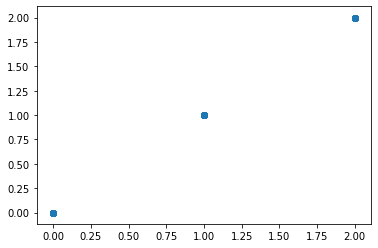

In [33]:
from matplotlib import pyplot
pyplot.scatter(y_test,pred)

In [34]:
#找參數
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

def get_best_model_and_accuracy(model, params, X, y):
    # n_jobs=-1 會使用cpu全部的運算力
    grid = GridSearchCV(model, params, cv=5, error_score=0, n_jobs=-1)
    grid.fit(X, y)
    print("Best accuracy: {}".format(grid.best_score_))
    print("Best params: {}".format(grid.best_params_))
    print("Average time to fit (s): {:.3f}".format(grid.cv_results_['mean_fit_time'].mean()))
    print("Average time to score (s): {:.3f}".format(grid.cv_results_['mean_score_time'].mean()))
    
    
clf = RandomForestClassifier()

pipeline = Pipeline([
    ('clf', clf)
])
params = {
    'clf__n_estimators': [10, 20, 50, 100],
    'clf__criterion': ['gini', 'entropy'],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [2, 5, 10],
}
get_best_model_and_accuracy(pipeline, params, wine.data, wine.target)

Best accuracy: 0.9719101123595506
Best params: {'clf__criterion': 'gini', 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}
Average time to fit (s): 0.031
Average time to score (s): 0.003


C:\Users\b1212\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
